In [1]:
%run Functions.ipynb

 [████████████████████████████████████████████████████████████] 1060079/1060079 [02:13<00:00, 0.00s/it]

asset=XBTUSD, my_signal=['fundingRate'],long_param=[0],short_param=[0], window_mm_open=59, window_hold=1080,window_mm_close=60, window_open_wrt_signal=-60,long=True, short=True, date_start=2018-08-01,n_days=0, size=0, improving_param_open=0, improving_param_close=0, commission_market_making=0.00025, commission_market_taking=-0.00075, percent=2047634, equity_per_trade=0.1, test=False, market_making=True, distribution_long_param=0, distribution_short_param=0, debug=False, strategy_type=mean_reversion


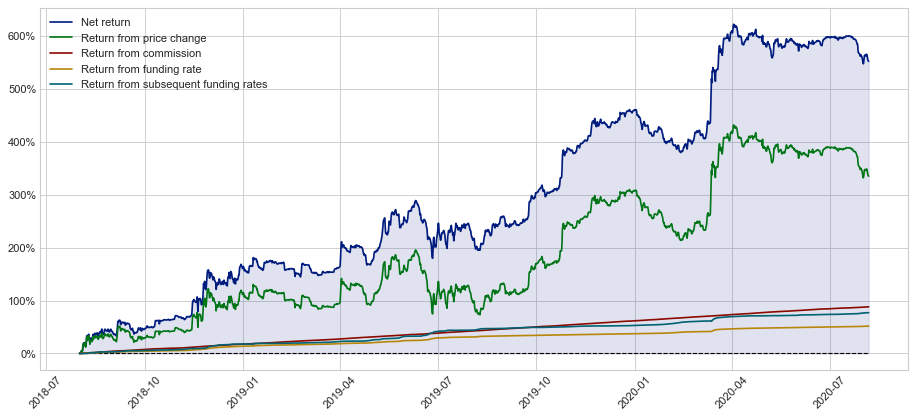

,configuration,Analysis period,Possible trades,Number of trades made,Number of longs,Number of shorts,Return from price change,Return from collected rate,Return from collected rate hold position,Return from commission open,Return from commission close,Total Return,Annual return,"Correlation (Price, rate)",Annual Std,Sharpe ratio,Percent Win,Percent Win Shorts,Percent Win Longs,Percent of trades opened,Percent of take profits,Percent of stop losses,Percent of close after hold,Avg Holding period (minutes),Avg Holding period (hours)
0,"asset=XBTUSD, my_signal=['fundingRate'],long_p...",from 2018-08-01 04:00:00 to 2020-08-06 04:00:00,2209,2060,617,1443,334.98 %,51.68 %,77.083 %,51.5 %,36.7 %,551.943 %,273.35 %,0.061689,138.062 %,1.979915,51.408 %,49.48 %,55.916 %,93.255 %,0.0 %,0.0 %,100.0 %,1080,18.0


In [2]:
summary, trades = Strategy("XBTUSD",                   # Name of the asset
                          exchanger= "bitmex",         # Exchanger where to trade
                          my_signal=["fundingRate"],   # List of conditions
                          window_open_wrt_signal=-60, 
                          window_mm_open=60, 
                          window_hold=18*60, 
                          window_mm_close=60,
                          long = True,                 # Allow long trades
                          short = True,                # Allow short trades
                          long_param = [0],            # Open position if rate < this parameter
                          short_param = [0],           # Open position if rate > this parameter
                          date_start = "2018-08-01",
                          market_making = True,       # Use market making strategy
                          divide=False)                # divide into train-test
Plot_results(trades,asset = "ETHUSD",show_cumulative=True)
summary

In [ ]:
#Plot_results(b,"XBTUSD",decompose=True,show_cumulative=True )

In [5]:
# To save returns _daily
date_df = trades[["date","return_from_trade"]]
date_df["date"] = [str(date_df["date"][i])[:-9] for i in range(len(date_df["date"]))] # Date 
date_df = date_df.groupby(['date']).sum()
date_df.to_csv("my_returns_daily.csv")

In [18]:
#Save funding bitmex
df = df_xbt_bitmex
df = df[abs(df["fundingRate"])>0]

date_df = df[["fundingRate"]]
date_df["date"] = [str(date_df.index[i])[:-9] for i in range(len(date_df))]
date_df = date_df.groupby(['date']).sum()
date_df.to_csv("my_returns_funding.csv")

240 60 60 1440 60 0.03 0.03

60 10 60 1440 60 0.03 0.03

360 60 60 1440 60 0.03 0.03

1440 240 60 1440 60 0.1 0.1